# **Mid-Term Summative Assessment — Data Science Fundamentals**

- **Duration:** approx 1-3 hours per exercise (5-15 hours of work)
- **Format:** Individual coursework, submitted via Cortex and GitHub
- **Weight:** 30% of module grade
- **Dataset:** `attendance_anonymised.csv`

---

### 🎯 **Learning Outcomes**

By completing this assessment, you will demonstrate your ability to:

* Manage a Python data-science project using Git and GitHub.
* Import, clean, and transform a real-world dataset using `pandas`.
* Visualise data using `matplotlib`/`seaborn`.
* Build and run a simple interactive app with `pyShiny`.
* Perform and interpret a basic statistical analysis (correlation or regression).

### **💡 Tips**

* Always work from an **active virtual environment**.
* Keep your notebook clean and readable.
* Commit after each week’s exercise (recommended but not marked)
* Use `requirements.txt` to ensure reproducibility.

## 📘 Instructions

# Exersise 1

### **Exercise 1 — Project Setup (Version Control & Environment)**


1. Go to github.com and create a **new empty GitHub repository** on your Github account (no README, .gitignore, or license). 
   > *!Ensure the repo is public.*
2. Copy the repository URL and paste it below

   https://github.com/shayeliza/datascience_mid_term_sum.git



3. In your terminal, navigate to a local folder and run `git clone`:

   ```bash
   cd ./datascience2025/ 
   git clone <your_repo_url>
   ```
   > Tips: 
   > 1. Replace `./datascience2025/` with a local path of your choice
   > 2. replace <your_repo_url> with the url you copied from Github, e.g. https://github.com/user/repo-url. 
   
   This command will download the remote Github repo to the local path. It will create a folder on your machine (e.g. `./datascience2025/<assessment_project_repo>/`) linked to the remote folder on Github.
4. Inside this folder, create:

   * `requirements.txt` — include all packages needed for the project (you may copy the one used in class).
   * `README.md` — write exactly:

     ```
     Hello world! I love summative assessments.
     ```
5. Stage and commit both files:

   ```bash
   git add .
   git commit -m "Initial commit with requirements and readme. I really love summatives."
   git push
   ```
   > If you prefer using the VS Code user interface to push your commit, please feel free. 

✅ **Checkpoint:** Refresh your repository on GitHub. It should show both files.



# Exersise 2

### **Exercise 2 — Data Cleaning & Exploration**



1. Load `attendance_anonymised.csv` using `pandas`.



In [1]:
# your code here
import pandas as pd
df = pd.read_csv("attendance_anonymised.csv")
df.head(5)


,Person Code,Unit Instance Code,Calocc Code,Surname,Forename,Long Description,Register Event ID,Object ID,Register Event Slot ID,Planned Start Date,Planned End Date,is Positive,Postive Marks,Negative Marks,Usage Code
0,129,278,2025,Lewis,Ursula,Nursing,37,37,574,2025-04-03,2023-11-01,Y,1,1,O
1,129,492,2023,Lewis,Ursula,Italian,726,37,1040,2023-11-03,2023-05-01,N,0,0,A
2,280,1266,2024,Lim,Michael,History,846,726,1123,2024-07-03,2023-05-07,N,0,0,A
3,280,1266,2024,Lim,Michael,History,846,726,653,2024-10-09,2025-04-29,N,0,0,A
4,280,1266,2023,Lim,Michael,History,846,726,776,2023-12-27,2025-03-22,N,0,0,A


### First I need to understand the dataset  - what each row and column is representing
- each row is a register entry. This dataset is a bit like a bunch of registers compiled together. Thats why each student is recorded multiple times. The rows represent a student in a specific class on a specific date. So we will think of this dataset as a load of registers put together. 
### I need to do some standard preprocessing and cleaning in this section
- for example, it would be useful to check that there are no duplicates in this register. i.e. same name, same class, same attendance status. 
- I feel like its safe to assume that person code = student ID. Other 'translations' for column names appear below provided by niccolo. Moving on! 

# Cleaning and preprocessing

In [2]:
# Checking for duplicate rows before I proceed
df.duplicated().any()


np.False_

Nope! No duplicates thats fab. what a clean dataset.

2. Describe the dataset using inbuilt functions such as `.head()`, `.info()`, `.describe()`.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17053 entries, 0 to 17052
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Person Code             17053 non-null  int64 
 1   Unit Instance Code      17053 non-null  int64 
 2   Calocc Code             17053 non-null  int64 
 3   Surname                 17053 non-null  object
 4   Forename                17053 non-null  object
 5   Long Description        17053 non-null  object
 6   Register Event ID       17053 non-null  int64 
 7   Object ID               17053 non-null  int64 
 8   Register Event Slot ID  17053 non-null  int64 
 9   Planned Start Date      17053 non-null  object
 10  Planned End Date        17053 non-null  object
 11  is Positive             17038 non-null  object
 12  Postive Marks           17053 non-null  int64 
 13  Negative Marks          17053 non-null  int64 
 14  Usage Code              17038 non-null  object
dtypes:

### Key observations:
- this is a pandas Dataframe 
- we have 14 different columns to investigate with a mix of integers and objects
- the non-null count tells us how many non-missing values there are for each column header. 
- there are 10753 rows/ register entries here. column has 10753 values except for "has attended" and "attendance code" which appear to be missing the same number of values. 
- We will investigate the "has attended" column against the "attendance code" column first. we may consider comparing "has attended" with "attended" because at first glance they appear to represent the same variable (whether or not a student has attended that class) in two different dattype values. One N/Y and one 1 or 0. For statistical analysis, I'll keep the binary numeric (0/1) rather than categorical ('Y'/'N'), as numeric encoding enables correlation and regression calculations.

In [4]:
# Checking which columns are actually in the dataframe
print("Available columns:")
print(df.columns.tolist())

Available columns:
['Person Code', 'Unit Instance Code', 'Calocc Code', 'Surname', 'Forename', 'Long Description', 'Register Event ID', 'Object ID', 'Register Event Slot ID', 'Planned Start Date', 'Planned End Date', 'is Positive', 'Postive Marks', 'Negative Marks', 'Usage Code']


In [5]:
comparisons = df[['is Positive', 'Postive Marks', 'Negative Marks']]
comparisons.head(20)

,is Positive,Postive Marks,Negative Marks
0,Y,1,1
1,N,0,0
2,N,0,0
3,N,0,0
4,N,0,0
5,N,0,0
6,N,0,0
7,Y,1,1
8,N,0,0
9,N,0,0


In [6]:
comparisons['is Positive'].isna().any()


np.True_

That means we have some NaN value in the Has attended column. 

In [7]:
comparisons['Postive Marks'].isna().any()


np.False_

I can just fill in the blanks! I would go ahead and just delete the 'has attended' column since 'attended' shows us the same thing in a different dtype but since I don't know what we'll be using the data for later it makes more sense to just fill in the blanks and keep the column. I will do that first, then I will investigate the 'attendance code column' because it looks like it has more than 2 values. Presumeably, late codes? I will come back to this thought.

In [8]:
df[df['is Positive'].isna()]

,Person Code,Unit Instance Code,Calocc Code,Surname,Forename,Long Description,Register Event ID,Object ID,Register Event Slot ID,Planned Start Date,Planned End Date,is Positive,Postive Marks,Negative Marks,Usage Code
1533,188,1772,2024,Nair,Rosa,Japanese,226,580,632,2024-04-22,2023-06-27,NaN,0,1,NaN
1728,188,1772,2025,Nair,Rosa,Japanese,160,580,244,2025-04-23,2024-11-29,NaN,0,1,NaN
1730,236,1772,2025,Thomas,Betty,Japanese,160,212,244,2025-04-23,2024-11-29,NaN,0,1,NaN
4771,198,1772,2025,Johnson,Arjun,Japanese,160,640,244,2025-04-23,2024-11-29,NaN,0,1,NaN
8804,7,1772,2024,Becker,Chen,Japanese,226,522,632,2024-04-22,2023-06-27,NaN,0,1,NaN
8896,455,1772,2025,Rodriguez,Sarah,Japanese,160,7,244,2025-04-23,2024-11-29,NaN,0,1,NaN
8901,28,1772,2025,Ben-Khalil,Kojo,Japanese,160,974,244,2025-04-23,2024-11-29,NaN,0,1,NaN
10883,269,1772,2024,Ramirez,Chiedza,Japanese,226,664,632,2024-04-22,2023-06-27,NaN,0,1,NaN
10972,14,1772,2025,Yang,Luis,Japanese,160,931,244,2025-04-23,2024-11-29,NaN,0,1,NaN
10973,297,1772,2025,Verma,Jessica,Japanese,160,698,244,2025-04-23,2024-11-29,NaN,0,1,NaN


### This is interesting...
- All students here are taking japanese. 
- You might assume that the teacher for this class just wasn't recording attendance. 
- I can fill out the NaN values in the 'Has Attended' column but I won't be able to do anything to the attendance code column since I don't know what the unique values mean yet. 
- Let's start by filling in these NaN 'has attended columns' 

In [9]:
# Where 'Has Attended' is NaN and 'Attended' is 0, set to 'N'
df.loc[(df['is Positive'].isna()) & (df['Postive Marks'] == 0), 'is Positive'] = 'N'

# Where 'Has Attended' is NaN and 'Attended' is 1, set to 'Y'
df.loc[(df['is Positive'].isna()) & (df['Postive Marks'] == 1), 'is Positive'] = 'Y'

In [10]:
df['is Positive'].isna().any()

np.False_

In [11]:
df.describe()

,Person Code,Unit Instance Code,Calocc Code,Register Event ID,Object ID,Register Event Slot ID,Postive Marks,Negative Marks
count,17053.000000,17053.000000,17053.000000,17053.000000,17053.000000,17053.000000,17053.000000,17053.000000
mean,258.244473,1252.674016,2023.913212,495.752536,504.818742,572.408139,0.716531,0.732892
std,146.904888,530.609058,0.774686,292.031166,275.174454,313.946746,0.450695,0.442462
min,1.000000,4.000000,2023.000000,1.000000,7.000000,0.000000,0.000000,0.000000
25%,146.000000,840.000000,2023.000000,223.000000,267.000000,297.000000,0.000000,0.000000
50%,265.000000,1306.000000,2024.000000,515.000000,504.000000,574.000000,1.000000,1.000000
75%,384.000000,1749.000000,2025.000000,788.000000,733.000000,839.000000,1.000000,1.000000
max,498.000000,1945.000000,2025.000000,984.000000,984.000000,1124.000000,1.000000,1.000000



The .describe() output reveals statistical summaries for numeric columns, but most are not meaningful for this dataset:

Non-informative statistics:
- Person Code, Module Code, Event IDs: These are categorical identifiers, not continuous variables. Their means and quartiles have no interpretive value.
- Year (Calocc Code): Ranges from 2023-2025, but quartiles are not useful here.

Meaningful statistics:
- Positive Marks: Mean = 0.72 (72% of records show attendance on average)
- Negative Marks: Mean = 0.73 (73% show non-attendance on average)

3. Drop the `Planned End Date` column.


In [12]:
df = df.drop(columns = 'Planned End Date', axis=1)

^ if there is an error when you run the cell above it's because the cell has already been run so it cant find the column name because it's already been dropped. nothing to worry about!

In [13]:
df.head()

,Person Code,Unit Instance Code,Calocc Code,Surname,Forename,Long Description,Register Event ID,Object ID,Register Event Slot ID,Planned Start Date,is Positive,Postive Marks,Negative Marks,Usage Code
0,129,278,2025,Lewis,Ursula,Nursing,37,37,574,2025-04-03,Y,1,1,O
1,129,492,2023,Lewis,Ursula,Italian,726,37,1040,2023-11-03,N,0,0,A
2,280,1266,2024,Lim,Michael,History,846,726,1123,2024-07-03,N,0,0,A
3,280,1266,2024,Lim,Michael,History,846,726,653,2024-10-09,N,0,0,A
4,280,1266,2023,Lim,Michael,History,846,726,776,2023-12-27,N,0,0,A


In [14]:
# Now I'm just checking to see if there are any important columns left with NaN values.

print(df['is Positive'].isna().any())
print(df['Postive Marks'].isna().any())
print(df['Negative Marks'].isna().any())
print(df['Usage Code'].isna().any())

False
False
False
True


Now I just need to check the attendance code column since apparently there are NaN values here. I also think there are more than 2 unique values in this column so I am interested to know what these represent. 

In [15]:

df['Usage Code'].unique()

array(['O', 'A', 'Y', 'P', 'L', 'Z', 'W', nan], dtype=object)

This includes way more than 2 values!

Since I have no indication of what these mean, it would make sense for me to just drop the column altogether. However, Niccolo might explain these meanings later in the notebook if they become relevant to analysis. For now, I'll just leave it as is. There is no way of filling in the NaN values either, since they don't clearly correspond with another attendance column. 

Moving on!

4. Rename the columns exactly as follows:

   | Old                    | New             |
   | ---------------------- | --------------- |
   | Person Code            | Person Code     |
   | Unit Instance Code     | Module Code     |
   | Calocc Code            | Year            |
   | Surname                | Surname         |
   | Forename               | Forename        |
   | Long Description       | Module Name     |
   | Register Event ID      | Event ID        |
   | Object ID              | Object ID       |
   | Register Event Slot ID | Event Slot ID   |
   | Planned Start Date     | Date            |
   | is Positive            | Has Attended    |
   | Postive Marks          | Attended        |
   | Negative Marks         | NotAttended     |
   | Usage Code             | Attendance Code |



In [16]:
df.rename(columns={
    "Person Code": "Person Code", 
    "Unit Instance Code": "Module Code",
    "Calocc Code": "year",
    "Surname": "Surname",
    "Forename" : "Forename",
    "Long Description": "Module Name",
    "Register Event ID": "Event ID",
    "Object ID": "Object ID",
    "Register Event Slot ID": "Event Slot ID",
    "Planned Start Date": "Date", 
    "is Positive": "Has Attended",
    "Postive Marks": "Attended",
    "Negative Marks": "NotAttended",
    "Usage Code": "Attendance Code"
}, inplace = True) # Added this because its changing the original dataframe 
df.columns 

Index(['Person Code', 'Module Code', 'year', 'Surname', 'Forename',
       'Module Name', 'Event ID', 'Object ID', 'Event Slot ID', 'Date',
       'Has Attended', 'Attended', 'NotAttended', 'Attendance Code'],
      dtype='object')

5. Convert `Date` to a pandas timestamp. 
   > tip: use `pd.to_datetime()`

In [17]:
# Checking what datatype date currently is
df['Date'].dtype

dtype('O')

In [18]:
# I don't know what 'O' stands for so I am checking this.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17053 entries, 0 to 17052
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Person Code      17053 non-null  int64 
 1   Module Code      17053 non-null  int64 
 2   year             17053 non-null  int64 
 3   Surname          17053 non-null  object
 4   Forename         17053 non-null  object
 5   Module Name      17053 non-null  object
 6   Event ID         17053 non-null  int64 
 7   Object ID        17053 non-null  int64 
 8   Event Slot ID    17053 non-null  int64 
 9   Date             17053 non-null  object
 10  Has Attended     17053 non-null  object
 11  Attended         17053 non-null  int64 
 12  NotAttended      17053 non-null  int64 
 13  Attendance Code  17038 non-null  object
dtypes: int64(8), object(6)
memory usage: 1.8+ MB


This dtype is 'O' for object. The pandas documentation says that pandas.Timestamp " is the pandas equivalent of python’s Datetime and is interchangeable with it in most cases". 
I will deomntsrate changing this data type below.

In [19]:

df['Date'] = pd.to_datetime(df['Date'])


In [20]:
df['Date'].dtype

dtype('<M8[ns]')

# Creating the History_df

6. Filter the DataFrame on **one specific module** (your choice) and plot its **attendance rate over time**
   (x = Date, y = the module's average attendance).



In [21]:
# I wil start by counting how many of each value is in the column module name
df['Module Name'].value_counts() 

Module Name
Algorithms                1140
Cloud Computing            940
Project Management         870
Quality Assurance          825
Linguistics                780
Arabic                     662
Journalism                 617
History                    600
Pharmacy                   600
System Administration      600
Public Speaking            580
International Business     551
Graphic Design             488
Geography                  448
Music Theory               442
Database Design            420
Theater                    420
French                     390
Chemistry                  360
Ethics                     354
Cybersecurity              326
Biology                    320
Medicine                   316
Leadership                 280
Statistics                 280
Arts & Crafts              266
User Experience Design     240
Digital Systems            228
Japanese                   226
Demographics               210
Nutrition                  200
Data Science               

Next I am going into the dataframe and filtering rows based on my 'history' condition. I am making a new dataframe called history which contains only rows where the module == history using a boolean filter system. 

In [22]:

History_df = df[df['Module Name'] == 'History'].copy() # im only making a copy here because when I try modify this slice later, i will get an error because pandas is being cautious. 
History_df.head(15)


,Person Code,Module Code,year,Surname,Forename,Module Name,Event ID,Object ID,Event Slot ID,Date,Has Attended,Attended,NotAttended,Attendance Code
2,280,1266,2024,Lim,Michael,History,846,726,1123,2024-07-03,N,0,0,A
3,280,1266,2024,Lim,Michael,History,846,726,653,2024-10-09,N,0,0,A
4,280,1266,2023,Lim,Michael,History,846,726,776,2023-12-27,N,0,0,A
5,280,1266,2025,Lim,Michael,History,295,726,735,2025-08-02,N,0,0,A
6,280,1266,2023,Lim,Michael,History,295,726,271,2023-07-02,N,0,0,A
11,384,1266,2023,Clark,Ruth,History,295,295,715,2023-11-11,Y,1,1,P
18,416,1266,2023,Rossi,Daniel,History,846,658,812,2023-01-08,N,0,0,A
23,346,1266,2023,Reddy,Hana,History,846,880,311,2023-06-04,Y,1,1,P
24,346,1266,2023,Reddy,Hana,History,846,880,917,2023-01-20,N,0,0,A
25,346,1266,2023,Reddy,Hana,History,295,880,715,2023-11-11,N,0,0,A


In [23]:
History_df.shape
# this is how I can check the correct number of rows has been copied over

(600, 14)

Next I will need to do attendance rate over time = (attendance rate / time)

In [24]:
date_grouped = History_df.groupby('Date') # using groupby to pull together intsances of classes. in other words, group all students who went to history class on X date.
# (and do for all class dates)
attendance_ot = date_grouped['Attended'].mean() # now make a new series showing the mean avg attendance rate per class 
attendance_ot

Date
2023-01-08    0.533333
2023-01-20    0.500000
2023-06-04    0.500000
2023-06-29    0.500000
2023-07-02    0.400000
2023-07-20    0.733333
2023-11-11    0.600000
2023-11-12    0.566667
2023-12-27    0.366667
2024-01-23    0.400000
2024-04-30    0.433333
2024-06-21    0.733333
2024-07-03    0.566667
2024-07-31    0.500000
2024-10-09    0.400000
2025-01-31    0.700000
2025-03-02    1.000000
2025-06-11    0.500000
2025-07-03    0.600000
2025-08-02    0.533333
Name: Attended, dtype: float64

In [25]:
attendance = attendance_ot.to_frame(name='avg_attendance') # converting this to a dataframe so that I can plot it
attendance.head()

,avg_attendance
Date,
2023-01-08,0.533333
2023-01-20,0.500000
2023-06-04,0.500000
2023-06-29,0.500000
2023-07-02,0.400000


Now I can plot this over time.

# Plotting

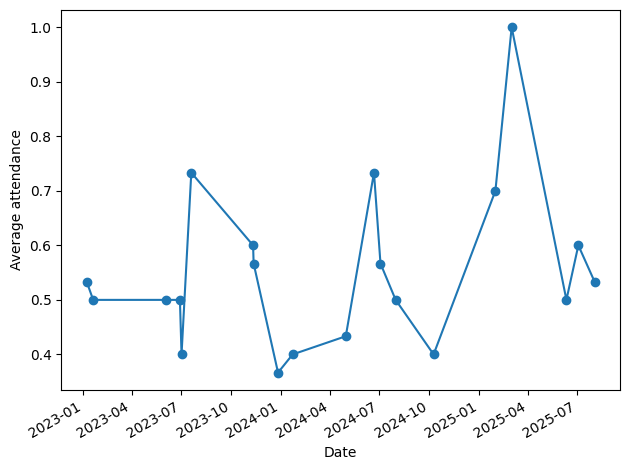

In [26]:
import matplotlib.pyplot as plt
attendance['avg_attendance'].plot(marker = 'o')
plt.xlabel('Date')
plt.ylabel('Average attendance')
plt.tight_layout()
plt.show()

I think that a bar plot might be better for this data. Let's have a look now:

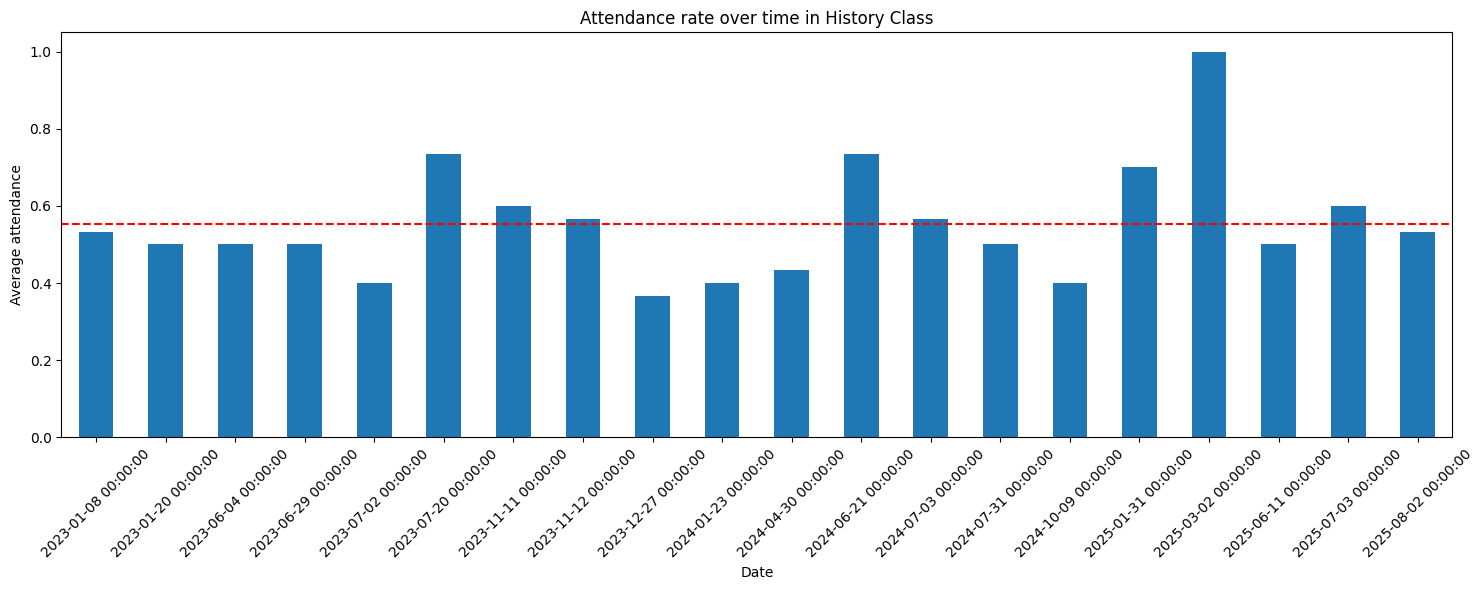

In [27]:
attendance['avg_attendance'].plot(kind='bar', figsize=(15, 6)) # Making this plot wider so that its more legible
plt.axhline(y=attendance['avg_attendance'].mean(), color='red', linestyle='--', label=f'Mean: {attendance["avg_attendance"].mean():.3f}') # Adding a horizontal line to visualise the mean clearly
plt.xlabel('Date')
plt.ylabel('Average attendance')
plt.title('Attendance rate over time in History Class')
plt.xticks(rotation=45)
plt.tight_layout()  # Doing this to prevent labels from getting cut iff
plt.show()

### What can I see?
- It looks like 100% of history students attended a class on the 31st Jan 2025! 
- I have plotted the red line along the mean average attendance for all classes which shows to be about 58% attendance 
- There is no particularly consistent pattern here, or obvious trend which isnt all that surprising! Attendance to classes tend to fluctuate over the years. 


7. **[For L6 students only]** Add a column, titled "Student Overall Attendance", with the average attendance for the student. Add a column, titled "Standardised Student Overall Attendance", with the z-scores of "Student Overall Attendance".

# L6 task

Plan:
1. Merge the name columns to make it simpler to groupby name 
2. Groupby full name 
3. Then make a for loop where for each student, calculate the mean avg attendance and add it to column "student overall attendance"
4. Then print a test dataframe by filtering the dataframe by one random student name and seeing if all values in new column are the same
5. Work out Z-scores using the Z-score equation and then add to a column in the same way

In [28]:
# Create column called "full name" which merges the forename and the surname 
df['full_name']=df['Forename'] +' ' + df['Surname']
df

,Person Code,Module Code,year,Surname,Forename,Module Name,Event ID,Object ID,Event Slot ID,Date,Has Attended,Attended,NotAttended,Attendance Code,full_name
0,129,278,2025,Lewis,Ursula,Nursing,37,37,574,2025-04-03,Y,1,1,O,Ursula Lewis
1,129,492,2023,Lewis,Ursula,Italian,726,37,1040,2023-11-03,N,0,0,A,Ursula Lewis
2,280,1266,2024,Lim,Michael,History,846,726,1123,2024-07-03,N,0,0,A,Michael Lim
3,280,1266,2024,Lim,Michael,History,846,726,653,2024-10-09,N,0,0,A,Michael Lim
4,280,1266,2023,Lim,Michael,History,846,726,776,2023-12-27,N,0,0,A,Michael Lim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17048,28,1867,2025,Ben-Khalil,Kojo,Project Management,788,974,544,2025-05-25,N,0,0,A,Kojo Ben-Khalil
17049,375,1867,2025,Becker,Tariq,Project Management,788,860,544,2025-05-25,Y,1,1,P,Tariq Becker
17050,407,1867,2025,Kumar,Thomas,Project Management,788,15,432,2025-02-16,N,0,0,A,Thomas Kumar
17051,18,1867,2023,Durand,Charles,Project Management,788,376,693,2023-10-01,Y,1,1,P,Charles Durand


In [29]:
# Then groupby the full name 
individuals = df.groupby('full_name')

# Then make a for loop where for each student, calculate the mean avg attendance and add it to column "student overall attendance"
for name, group in individuals:  #For each student in the dataframe 
    #Calculate the mean avg attendance
    student_avg = group['Attended'].mean()
    #Add this average to all rows for this student 
    df.loc[group.index, 'student_overall_attendance'] = student_avg 


In [30]:
print (df.columns)

Index(['Person Code', 'Module Code', 'year', 'Surname', 'Forename',
       'Module Name', 'Event ID', 'Object ID', 'Event Slot ID', 'Date',
       'Has Attended', 'Attended', 'NotAttended', 'Attendance Code',
       'full_name', 'student_overall_attendance'],
      dtype='object')


In [31]:
# Then print a test dataframe by filtering the dataframe by one random student name and seeing if all values in new column are the same
Checking_df = df[df['full_name'] == 'Ursula Lewis'].copy()
Checking_df.head()

,Person Code,Module Code,year,Surname,Forename,Module Name,Event ID,Object ID,Event Slot ID,Date,Has Attended,Attended,NotAttended,Attendance Code,full_name,student_overall_attendance
0,129,278,2025,Lewis,Ursula,Nursing,37,37,574,2025-04-03,Y,1,1,O,Ursula Lewis,0.875
1,129,492,2023,Lewis,Ursula,Italian,726,37,1040,2023-11-03,N,0,0,A,Ursula Lewis,0.875
1512,129,1247,2023,Lewis,Ursula,Data Science,414,37,1034,2023-01-24,Y,1,1,P,Ursula Lewis,0.875
1514,129,123,2023,Lewis,Ursula,Creative Writing,797,37,739,2023-11-07,Y,1,1,P,Ursula Lewis,0.875
1607,129,1787,2024,Lewis,Ursula,Geography,576,37,797,2024-05-26,Y,1,1,O,Ursula Lewis,0.875


In [32]:
df.head()

,Person Code,Module Code,year,Surname,Forename,Module Name,Event ID,Object ID,Event Slot ID,Date,Has Attended,Attended,NotAttended,Attendance Code,full_name,student_overall_attendance
0,129,278,2025,Lewis,Ursula,Nursing,37,37,574,2025-04-03,Y,1,1,O,Ursula Lewis,0.875000
1,129,492,2023,Lewis,Ursula,Italian,726,37,1040,2023-11-03,N,0,0,A,Ursula Lewis,0.875000
2,280,1266,2024,Lim,Michael,History,846,726,1123,2024-07-03,N,0,0,A,Michael Lim,0.216216
3,280,1266,2024,Lim,Michael,History,846,726,653,2024-10-09,N,0,0,A,Michael Lim,0.216216
4,280,1266,2023,Lim,Michael,History,846,726,776,2023-12-27,N,0,0,A,Michael Lim,0.216216


## Next up:
"Add a column, titled "Standardised Student Overall Attendance", with the z-scores of "Student Overall Attendance"."

In [33]:
# First im going to work out the z-score of student_overall_attendance
# Z score = (original value - mean of the feature)/ standard deviation of feature.
df['Standardised Student Overall Attendance'] = (df['student_overall_attendance'] - df['student_overall_attendance'].mean()) / df['student_overall_attendance'].std()
df.head()

,Person Code,Module Code,year,Surname,Forename,Module Name,Event ID,Object ID,Event Slot ID,Date,Has Attended,Attended,NotAttended,Attendance Code,full_name,student_overall_attendance,Standardised Student Overall Attendance
0,129,278,2025,Lewis,Ursula,Nursing,37,37,574,2025-04-03,Y,1,1,O,Ursula Lewis,0.875000,0.777499
1,129,492,2023,Lewis,Ursula,Italian,726,37,1040,2023-11-03,N,0,0,A,Ursula Lewis,0.875000,0.777499
2,280,1266,2024,Lim,Michael,History,846,726,1123,2024-07-03,N,0,0,A,Michael Lim,0.216216,-2.454698
3,280,1266,2024,Lim,Michael,History,846,726,653,2024-10-09,N,0,0,A,Michael Lim,0.216216,-2.454698
4,280,1266,2023,Lim,Michael,History,846,726,776,2023-12-27,N,0,0,A,Michael Lim,0.216216,-2.454698


✅ **Checkpoint:** Cleaned DataFrame and a line or bar plot of attendance over time for one module.

---



# 3. Shiny App

### **Exercise 3 — Make it Shiny**


In [34]:
# Importing the cleanest version of my dataframe to use in shiny!
df.to_csv('shiny_dataframe.csv', index = False)


1. Create a file called `app.py`.
2. Build a minimal Shiny app that only displays the plot you created in the previous exercise.
3. Run the app locally using this terminal command:

   ```bash
   shiny run --reload --launch-browser app.py
   ```
   > if your terminal is not in the same folder where the `app.py` file is, you will need to specify the correct path, e.g. `shiny run --reload --launch-browser /path/to/my/app.py`

4. **[For L6 students only]** Enhance the app with a title and at least one more UI element. E.g., you could enhance the app with interactivity (e.g. allow the user to select the module to plot).

✅ **Checkpoint:** The app runs without errors and displays the plot from Exercise 2 in a browser.

---

# Exersise 4

### **Exercise 4 — Comparing Modules**



1. Compute the **mean** and **standard deviation** of attendance per module using pandas `groupby`. Consult the documentation if needed.


Plan:
1. Use groupby to group modules
2. Then make a for loop where for each module, calculate the mean avg attendance and add it to column "overall module attendance avg"
3. Text I need to compute the mean attendance per module
4. Finally, compute the standard deviation of attendance per module 

# First, Groupby and Forloops

In [35]:
#PLAN
#Use groupby to group modules rather than names this time 
modules_grouped = df.groupby('Module Name')

# Then make a for loop where for each module, calculate the mean avg attendance and add it to column "overall module attendance avg"
for module_name, group in modules_grouped:  #For each unique module in the grouped modules 
    #Calculate the mean avg attendance
    module_avg = group['Attended'].mean()
    #Add this average to all rows for this module 
    df.loc[group.index, 'overall module attendance avg'] = module_avg
    
df.head()

,Person Code,Module Code,year,Surname,Forename,Module Name,Event ID,Object ID,Event Slot ID,Date,Has Attended,Attended,NotAttended,Attendance Code,full_name,student_overall_attendance,Standardised Student Overall Attendance,overall module attendance avg
0,129,278,2025,Lewis,Ursula,Nursing,37,37,574,2025-04-03,Y,1,1,O,Ursula Lewis,0.875000,0.777499,0.993333
1,129,492,2023,Lewis,Ursula,Italian,726,37,1040,2023-11-03,N,0,0,A,Ursula Lewis,0.875000,0.777499,0.622517
2,280,1266,2024,Lim,Michael,History,846,726,1123,2024-07-03,N,0,0,A,Michael Lim,0.216216,-2.454698,0.553333
3,280,1266,2024,Lim,Michael,History,846,726,653,2024-10-09,N,0,0,A,Michael Lim,0.216216,-2.454698,0.553333
4,280,1266,2023,Lim,Michael,History,846,726,776,2023-12-27,N,0,0,A,Michael Lim,0.216216,-2.454698,0.553333


In [36]:
# Next I need to compute the mean attendance per module 
# Since I have already worked out the mean overall module attendance avg and put it in a column
# I could just print the first value from each group so that we can visualise it
mapm = df.groupby('Module Name')['overall module attendance avg'].first()
mapm # mapm - mean average per module

Module Name
Algorithms                0.744737
Arabic                    0.752266
Arts & Crafts             0.605263
Biology                   0.618750
Biomedical Engineering    0.650000
Business Intelligence     0.782051
Chemistry                 0.675000
Cloud Computing           0.840426
Creative Writing          0.967105
Cybersecurity             0.957055
Data Analysis             0.466667
Data Science              0.942105
Database Design           0.645238
Demographics              0.885714
Digital Systems           0.622807
Discrete Mathematics      0.776786
English Literature        0.975000
Epidemiology              1.000000
Ethics                    0.759887
French                    0.928205
Geography                 0.868304
Graphic Design            0.065574
History                   0.553333
Information Technology    0.842857
International Business    0.669691
Italian                   0.622517
Japanese                  0.663717
Journalism                0.807131
Leadersh

# Next up: standard deviation

In [37]:
stdpm = df.groupby('Module Name')['Attended'].std()
stdpm # stdpm - standard deviation per module

Module Name
Algorithms                0.436200
Arabic                    0.432023
Arts & Crafts             0.489715
Biology                   0.486454
Biomedical Engineering    0.483046
Business Intelligence     0.415525
Chemistry                 0.469027
Cloud Computing           0.366406
Creative Writing          0.178951
Cybersecurity             0.203044
Data Analysis             0.504525
Data Science              0.234161
Database Design           0.479012
Demographics              0.318918
Digital Systems           0.485750
Discrete Mathematics      0.418272
English Literature        0.156615
Epidemiology              0.000000
Ethics                    0.427757
French                    0.258480
Geography                 0.338538
Graphic Design            0.247790
History                   0.497562
Information Technology    0.366563
International Business    0.470752
Italian                   0.486371
Japanese                  0.473486
Journalism                0.394871
Leadersh

# Finally, Seaborn

2. Create a `seaborn.barplot` of mean attendance per module with 95% confidence intervals.


Plan:
1. Sort values from lowest to highest so that the plot is easy to visualise 
2. Sreate a seaborn plot which will create 95% confidence intervals 

In [38]:
mapm_df = mapm.sort_values().to_frame() # Im sorting them from lowest to highest so that when I plot, the trend is much easier to interpret. 
mapm_df

,overall module attendance avg
Module Name,
Graphic Design,0.065574
Strategic Planning,0.436364
Data Analysis,0.466667
Statistics,0.485714
Theater,0.521429
Pharmacy,0.538333
History,0.553333
User Experience Design,0.554167
Web Development,0.566667


C:\Users\shayb\AppData\Local\Temp\ipykernel_28960\1986612445.py:8: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.barplot(data=df, x='Module Name', y='Attended', errorbar=('ci',95), capsize=0.5, errwidth=1, order = module_order)


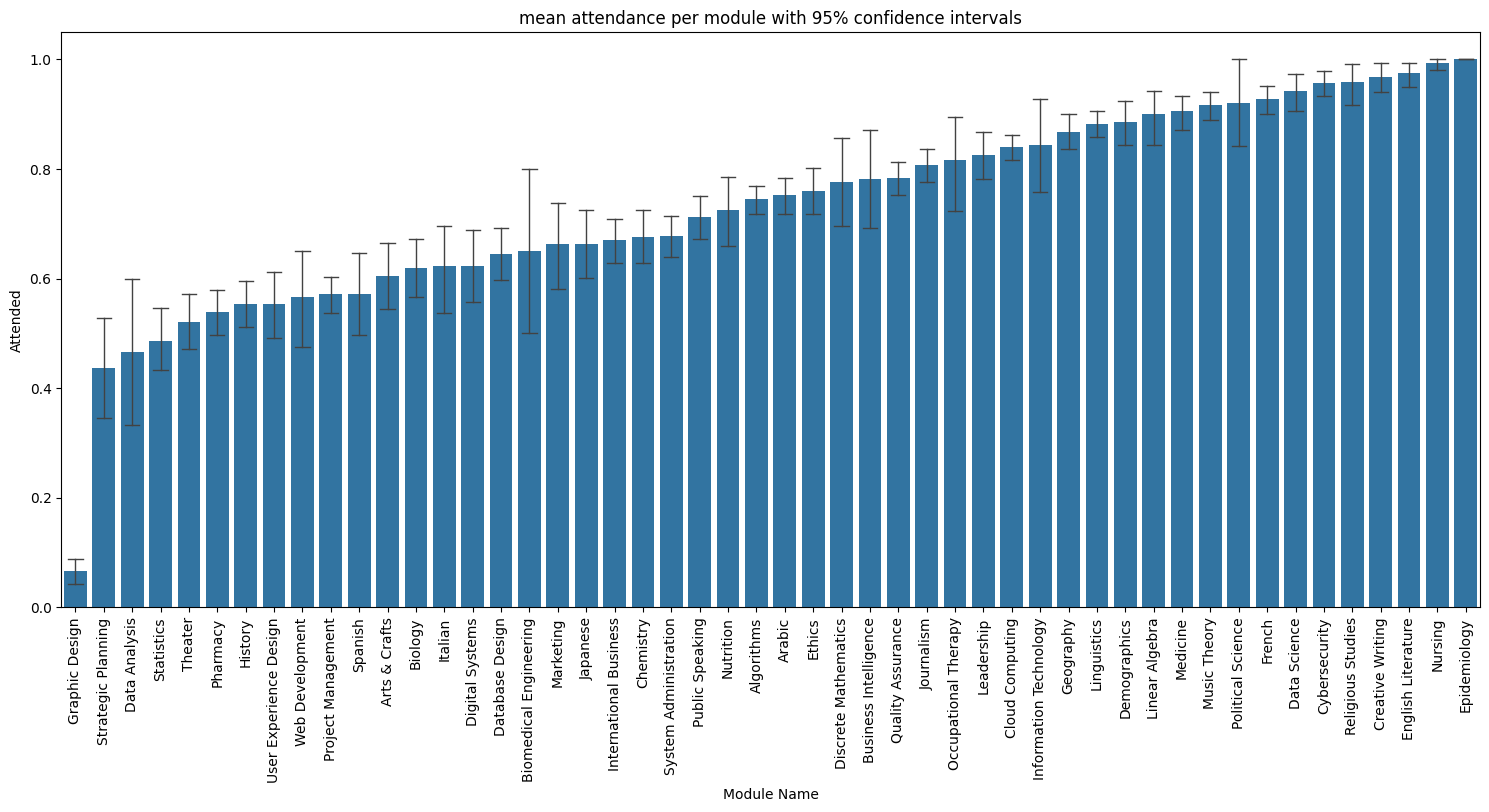

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

mean_attendance = mapm_df.sort_values(by = 'overall module attendance avg') #Sort values in mapm dataframe to be ascending so that its better to visualise 
module_order = mean_attendance.index

plt.figure(figsize=(15,8))
sns.barplot(data=df, x='Module Name', y='Attended', errorbar=('ci',95), capsize=0.5, errwidth=1, order = module_order)
plt.xticks(rotation=90)
plt.tight_layout()
plt.title('mean attendance per module with 95% confidence intervals')
plt.show()



3. Write a short interpretation (2–3 sentences) explaining what the plot and error bars show.

Error bars essentially tell us how confident we can be about each module's true mean attendance - the longer the error bar, the more variation there is in the data and thus the less accurate the mean is. For example, Epidemiology has a tiny error bar because it only had one class where everyone attended, whilst Biomedical Engineering has one of the largest error bars, indicating high variability where some classes had excellent attendance and others had extremely poor attendance. Generally speaking though, the error bars aren't particularly large, so you could say this is quite a good model overall.

✅ **Checkpoint:** My notebook and/or my Shiny app show a barplot with error bars, one bar per module (x-axis), where the height of the bar is the module's attendance rate (y-axis).

---



# Exersise 5

### **Exercise 5 — Attendance Relationships**



1. Answer the question: **Do students with low overall attendance tend to attend modules that have low attendance?**.

2. **[For L5 students only]**. Choose between a correlation analysis or a linear regression analysis to answer the question.

3. **[For L6 students only]** Run both correlation analysis and linear regression analysis to answer the same question. Do they tell the same story?

> Tips:
> 1. Compute the mean attendance rate of each module. Can you re-use some of the `groupby` code you wrote above?
> 2. For each module, compute the average overall attendance of the students who attended that module.
> 3. Correlation and linear regression can both help you answer the question. 
> 4. Report main statistic and p-value(s).


### Research Question & Hypothesis

Central Question: Do students with low overall attendance tend to attend modules that have low attendance?

Why this matters: Understanding the relationship between individual and module-level attendance patterns could reveal whether:
- Struggling students gravitate toward less popular modules
- Attendance is primarily an individual trait or influenced by module-level factors

Hypothesis: If low-attending students tend to be in low-attendance modules, we should observe a positive correlation between:
- (predictor variable): Module's overall attendance rate
- (outcome variable): Individual student's attendance in that specific module

To test this hypothesis, I will employ two complementary statistical methods:

1. **Pearson Correlation Analysis** - Quantifies the strength and direction of the linear relationship
2. Linear Regression (OLS) - Models the predictive relationship

Each data point represents **one student enrolled in one module** (n = 1,007), NOT individual class sessions (n = 17,053). This aggregation is essential to avoid pseudoreplication - counting the same student-module relationship multiple times would artificially inflate sample size and produce misleading p-values.

now some fun to understand the 'logic'
> - "Jessica never shows up to class"
> - "Yeah well apparently she was like, the only one in data science last week"
> - "No way! why would she show up to the only class none of us go to? does she hate big classes?"

(I am using dialogue here to try and break down the logic of the question)


### Basically, we need a Jessica.

The Plan: 
1. I have already calculated the mean average attendance rate per module in mapm
2. I need  to calculate Jessicas avg attendance in History class for example, and then again for Science, then again for Maths. So, jessica will have several mean attendances - one for every module. I will need to add a condition where I groupby module and name at the same time.
3. Do linear regression 
4. Do pearsons correlation analysis 
5. Do OLS
6. Do written analysis! 

# First, Linear regression

In [40]:
# I have already calculated the mean attendance rate of each module in mapm
mapm.head()

Module Name
Algorithms                0.744737
Arabic                    0.752266
Arts & Crafts             0.605263
Biology                   0.618750
Biomedical Engineering    0.650000
Name: overall module attendance avg, dtype: float64

In [41]:
# Going back to the history dataframe but this time the new columns exist
History_df_new = df[df['Module Name'] == 'History'].copy() # Im only making a copy here because when I try modify this slice later, I will get an error because pandas is being cautious. 
History_df_new.head(15)

,Person Code,Module Code,year,Surname,Forename,Module Name,Event ID,Object ID,Event Slot ID,Date,Has Attended,Attended,NotAttended,Attendance Code,full_name,student_overall_attendance,Standardised Student Overall Attendance,overall module attendance avg
2,280,1266,2024,Lim,Michael,History,846,726,1123,2024-07-03,N,0,0,A,Michael Lim,0.216216,-2.454698,0.553333
3,280,1266,2024,Lim,Michael,History,846,726,653,2024-10-09,N,0,0,A,Michael Lim,0.216216,-2.454698,0.553333
4,280,1266,2023,Lim,Michael,History,846,726,776,2023-12-27,N,0,0,A,Michael Lim,0.216216,-2.454698,0.553333
5,280,1266,2025,Lim,Michael,History,295,726,735,2025-08-02,N,0,0,A,Michael Lim,0.216216,-2.454698,0.553333
6,280,1266,2023,Lim,Michael,History,295,726,271,2023-07-02,N,0,0,A,Michael Lim,0.216216,-2.454698,0.553333
11,384,1266,2023,Clark,Ruth,History,295,295,715,2023-11-11,Y,1,1,P,Ruth Clark,0.698630,-0.087826,0.553333
18,416,1266,2023,Rossi,Daniel,History,846,658,812,2023-01-08,N,0,0,A,Daniel Rossi,0.774194,0.282911,0.553333
23,346,1266,2023,Reddy,Hana,History,846,880,311,2023-06-04,Y,1,1,P,Hana Reddy,0.551282,-0.810762,0.553333
24,346,1266,2023,Reddy,Hana,History,846,880,917,2023-01-20,N,0,0,A,Hana Reddy,0.551282,-0.810762,0.553333
25,346,1266,2023,Reddy,Hana,History,295,880,715,2023-11-11,N,0,0,A,Hana Reddy,0.551282,-0.810762,0.553333


The student_overall_attendance is different for each student in this module. The modules attendance average is the same throughout. HOWEVER, the student_overall_attendance does not consider module - it only calculates avg attendance for all and any classes that person attended. Thus we move on to step 2. 

In [42]:
# So I need to add a condition where I groupby module and name at the same time.
student_module_groups = df.groupby(['full_name', 'Module Name']) 

for (name, group) in student_module_groups:  
    #Calculate the mean avg attendance
    temp_avg = group['Attended'].mean() 
    # Add this average to all rows for this student
    df.loc[group.index, 'mapm'] = temp_avg


In [43]:
df.head()

,Person Code,Module Code,year,Surname,Forename,Module Name,Event ID,Object ID,Event Slot ID,Date,Has Attended,Attended,NotAttended,Attendance Code,full_name,student_overall_attendance,Standardised Student Overall Attendance,overall module attendance avg,mapm
0,129,278,2025,Lewis,Ursula,Nursing,37,37,574,2025-04-03,Y,1,1,O,Ursula Lewis,0.875000,0.777499,0.993333,0.90
1,129,492,2023,Lewis,Ursula,Italian,726,37,1040,2023-11-03,N,0,0,A,Ursula Lewis,0.875000,0.777499,0.622517,0.60
2,280,1266,2024,Lim,Michael,History,846,726,1123,2024-07-03,N,0,0,A,Michael Lim,0.216216,-2.454698,0.553333,0.05
3,280,1266,2024,Lim,Michael,History,846,726,653,2024-10-09,N,0,0,A,Michael Lim,0.216216,-2.454698,0.553333,0.05
4,280,1266,2023,Lim,Michael,History,846,726,776,2023-12-27,N,0,0,A,Michael Lim,0.216216,-2.454698,0.553333,0.05


Now in theory, if I were to filter by student AND module, the student_module_average column should show all of the same number. 

Let's try. 

In [44]:
Michael_lim_History = df[(df['full_name'] == 'Michael Lim') & (df['Module Name'] == 'History')]
Michael_lim_History.head()

,Person Code,Module Code,year,Surname,Forename,Module Name,Event ID,Object ID,Event Slot ID,Date,Has Attended,Attended,NotAttended,Attendance Code,full_name,student_overall_attendance,Standardised Student Overall Attendance,overall module attendance avg,mapm
2,280,1266,2024,Lim,Michael,History,846,726,1123,2024-07-03,N,0,0,A,Michael Lim,0.216216,-2.454698,0.553333,0.05
3,280,1266,2024,Lim,Michael,History,846,726,653,2024-10-09,N,0,0,A,Michael Lim,0.216216,-2.454698,0.553333,0.05
4,280,1266,2023,Lim,Michael,History,846,726,776,2023-12-27,N,0,0,A,Michael Lim,0.216216,-2.454698,0.553333,0.05
5,280,1266,2025,Lim,Michael,History,295,726,735,2025-08-02,N,0,0,A,Michael Lim,0.216216,-2.454698,0.553333,0.05
6,280,1266,2023,Lim,Michael,History,295,726,271,2023-07-02,N,0,0,A,Michael Lim,0.216216,-2.454698,0.553333,0.05


Now im beginning to wonder if Michael Lim - the new 'Jessica', actually takes any other classes...
He must, since his student overall attendance is higher than his history attendance. Michael attended 1 history class. Thats not very good,  is it now, Michael. 

Now that I've checked that its all worked well, I can move on to answering the key question. 

> ### do students with low overall attendance tend to attend modules that have low attendance? 
> - H1 (Alternative): There is a negative correlation between student module attendance average and overall module attendance average (students with lower attendance tend to be in modules with lower overall attendance)
> - H0 (Null): There is no relationship between student module attendance average and overall module attendance average

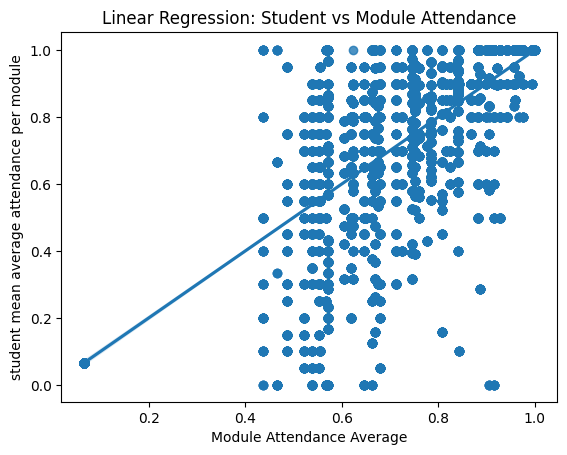

In [45]:
# Next im plotting the graph using seaborn to do

import seaborn as sns 
import matplotlib.pyplot as plt 

sns.regplot(data=df, x='overall module attendance avg', y='mapm') # Creating a scatter plot with linear regression line - regplot automatically fits OLS regression and plots the line

plt.xlabel("Module Attendance Average")
plt.ylabel("student mean average attendance per module")
plt.title("Linear Regression: Student vs Module Attendance")
plt.show()

How odd that we have just one data point in the bottom left corner. Let's check to see if this really is a datapoint.

In [46]:
df['overall module attendance avg'].min()

np.float64(0.06557377049180328)

This checks out!

### Analysis:
- The substantial spread indicates considerable individual variation beyond the module-level trend. 
- The regression line is at a clear 45 degree angle! This suggests that there may be a strong positive relationship of sorts. 
- This line is so well angled, it almost appears directly proportional where the module attendance average is directly proportional to the student mean average attendance. 
- This suggests that students roughly mirror their modules attendance rate. 
- There is HEAVY clustering on the higher end of the module attendance average - THIS observation in particular points to a different hypothesis. Our alternative hypothesis is about how students with low overall attendance tend to attend modules that have low attendance. We can't exactly accept this here. we may be able to observe that students with a high overall attendance tend to attend modules that have low attendance - and looking at the linear regression line, we may PREDICT that students with lower overall attendance tend to attend modules with low attendance rate - however this is a PREDICTION based off of the trend and there are few actual datapoints to support this .
- There arent many modules where the attendance drops below 50% on average. there is however, lots of variation for students. We can see some students whose mean average attendance per module is quite low, even in a moderately popular course. 
- There is a very sparse bottom right region! this shos that few students have very low attendance in high attendance modules. this could howowever, also mean that popular modules don't lose many students.
- The predictor variable isnt very indicative of causation, but this linear regression model does demonstrate correlation of sorts.

### Preliminary conclusion: 
The plot provides visual evidence supporting our hypothesis, with the important caveat that evidence is strongest for moderate-to-high attendance ranges and thinner (though still supportive) for the low-attendance range our hypothesis specifically targets. Fo


### Next step is to do pearsons correlation coefficient!

# Next, Pearsons Correlation Coefficient

In [47]:
from scipy import stats

# Aggregate to one row per student-module because my code has loads of duplicate rows! jessica +history might appear 10+ times. this groups all of 'jessicas' history rows into one bundle. 
regression_df = df.groupby(['full_name', 'Module Name']).agg({ 
    'mapm': 'first', 
    'overall module attendance avg': 'first' # For each bundle keep the first value of mapm and overall module attendance avg
}).reset_index() # Turns the grouped data back into a normal dataframe


In [48]:
# Pearsons correlation coefficient 
correlation, p_value = stats.pearsonr( 
    regression_df['overall module attendance avg'], 
    regression_df['mapm']
)

print(f"Pearson correlation coefficient: {correlation}")  
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Result: Statistically significant correlation (p < 0.05)")
else:
    print("Result: not statistically significant (p >= 0.05)")

Pearson correlation coefficient: 0.6266458275822677
P-value: 5.8695358203735616e-111
Result: Statistically significant correlation (p < 0.05)


### Analysis: 
The correlation coefficient of r = +0.627 indicates a moderate-to-strong positive correlation between module attendance and individual student attendance
- The strength is substantial but not overwhelming (0.6-0.7 is considered strong in social sciences)
- This is far from a perfect correlation (r = 1.0), which is confirmed by our visual observation of considerable scatter of datapoints around the line. 
- The P-value of  5.8695358203735616e-111 is so small its basically zero. thus, The probability this correlation occurred by random chance is also extremely small! thats great news for our analysis. It means we aren't seeing this - albeit very scattered - pattern by chance. 


preliminary conclusion (building on previous preliminary conclusion): 
- We can now confidently reject the null hypothesis 
- students are definitely influenced by module-level factors but retain free will. Some students thrive in struggling modules; others disengage from popular ones.


# Last, but not least, some OLS
To complement the correlation analysis, I'll now build a linear regression model using OLS. 

In [49]:
from statsmodels.formula.api import ols

# renaming columns for formula syntax 
regression_df.columns = ['full_name', 'Module_Name', 'mapm', 'module_avg']
formula = 'mapm ~ module_avg' # defining the regression formula. then doing Outcome ~ predictor
model = ols(formula, data=regression_df).fit() # fitting OLS model
print(model.summary()) # printing the 'reciept looking one' 

                            OLS Regression Results                            
Dep. Variable:                   mapm   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     649.8
Date:                Sat, 15 Nov 2025   Prob (F-statistic):          5.87e-111
Time:                        03:07:27   Log-Likelihood:                 196.93
No. Observations:                1007   AIC:                            -389.9
Df Residuals:                    1005   BIC:                            -380.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0032      0.030     -0.107      0.9

### Analysis:
The Ordinary Least Squares regression provides a predictive equation and extends our correlation analysis with additional statistical detail - which I can add to the understanding I just gained from all of the previous analysis work!

**Research Question:** Do students with low overall attendance tend to attend modules that have low attendance?

**Answer:** **Yes, supported by converging evidence from multiple analyses.**

1. linear regression analysis showed a clear positive linear regression with lots of individual variation 
2. pearsons correlation coefficient value showed a moderately strong positive correlation and p value showed statistical significance 
3. OLS showed: 

- R-Squared = the proportion of variance in student attendance as explained by module attendance. 0.393 = 39.3%. This means that 39.3% of the variation in student attendance can be explained by module attendance. this isnt too bad! it shows a pretty solid real relationship. LOW for an R-Squared is normally more like 20% and lower. 
- F-stat = tests whether my overall model is better than just predicting the mean. 649.8. Bigger F = model explains more relative to error. 649.8 is HUGE. My model explains way more variance than random chance would, thus my model is definitely useful here. 
- The intercept is -0.0032 which means that where the regression line crosses x=0, Y = -0.-32 which supports the idea that our model almost shows direct proportionality in a almost perfect 1:1 
- std error = 
- module_avg = THE SLOPE. how much does Y change when X increases by one unit.this data explains that if a module attendance increases by 0.01 (a 1 percent point): student attendance increases by (1.0039 x 0.01 = 0.010039) a slope of 1.0 is special because It means students track almost perfectly with their module - there's a 1-to-1 relationship


All three analytical methods converge on the same finding: students' attendance behaviour is significantly influenced by their module's overall attendance rate, with an average 1:1 tracking relationship. However, the moderate pearsons coefficient reveals significant individual variation. some students thrive in struggling modules while others disengage from popular ones. The relationship is real, statistically robust, and practically meaningful, but free wil and circumstances remain powerful factors accounting for the majority (61%) of attendance variation.


✅ **Checkpoint:** Table or printout showing correlation or regression results.

# THE END!